In [1]:
import numpy as np
import pandas as pd
import os
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def preprocress(df):
    df.replace('NA', np.nan, inplace=True)
    df.replace('', np.nan, inplace=True)
    df.replace('..', np.nan, inplace=True)
    df.dropna()
    threshold =0.25
    # Find columns with more than the threshold NaN values
    drop_cols = df.columns[(df.isnull().sum() > threshold * df.shape[0])]

    # Drop columns with more than the threshold NaN values
    df.drop(drop_cols, axis=1, inplace=True)

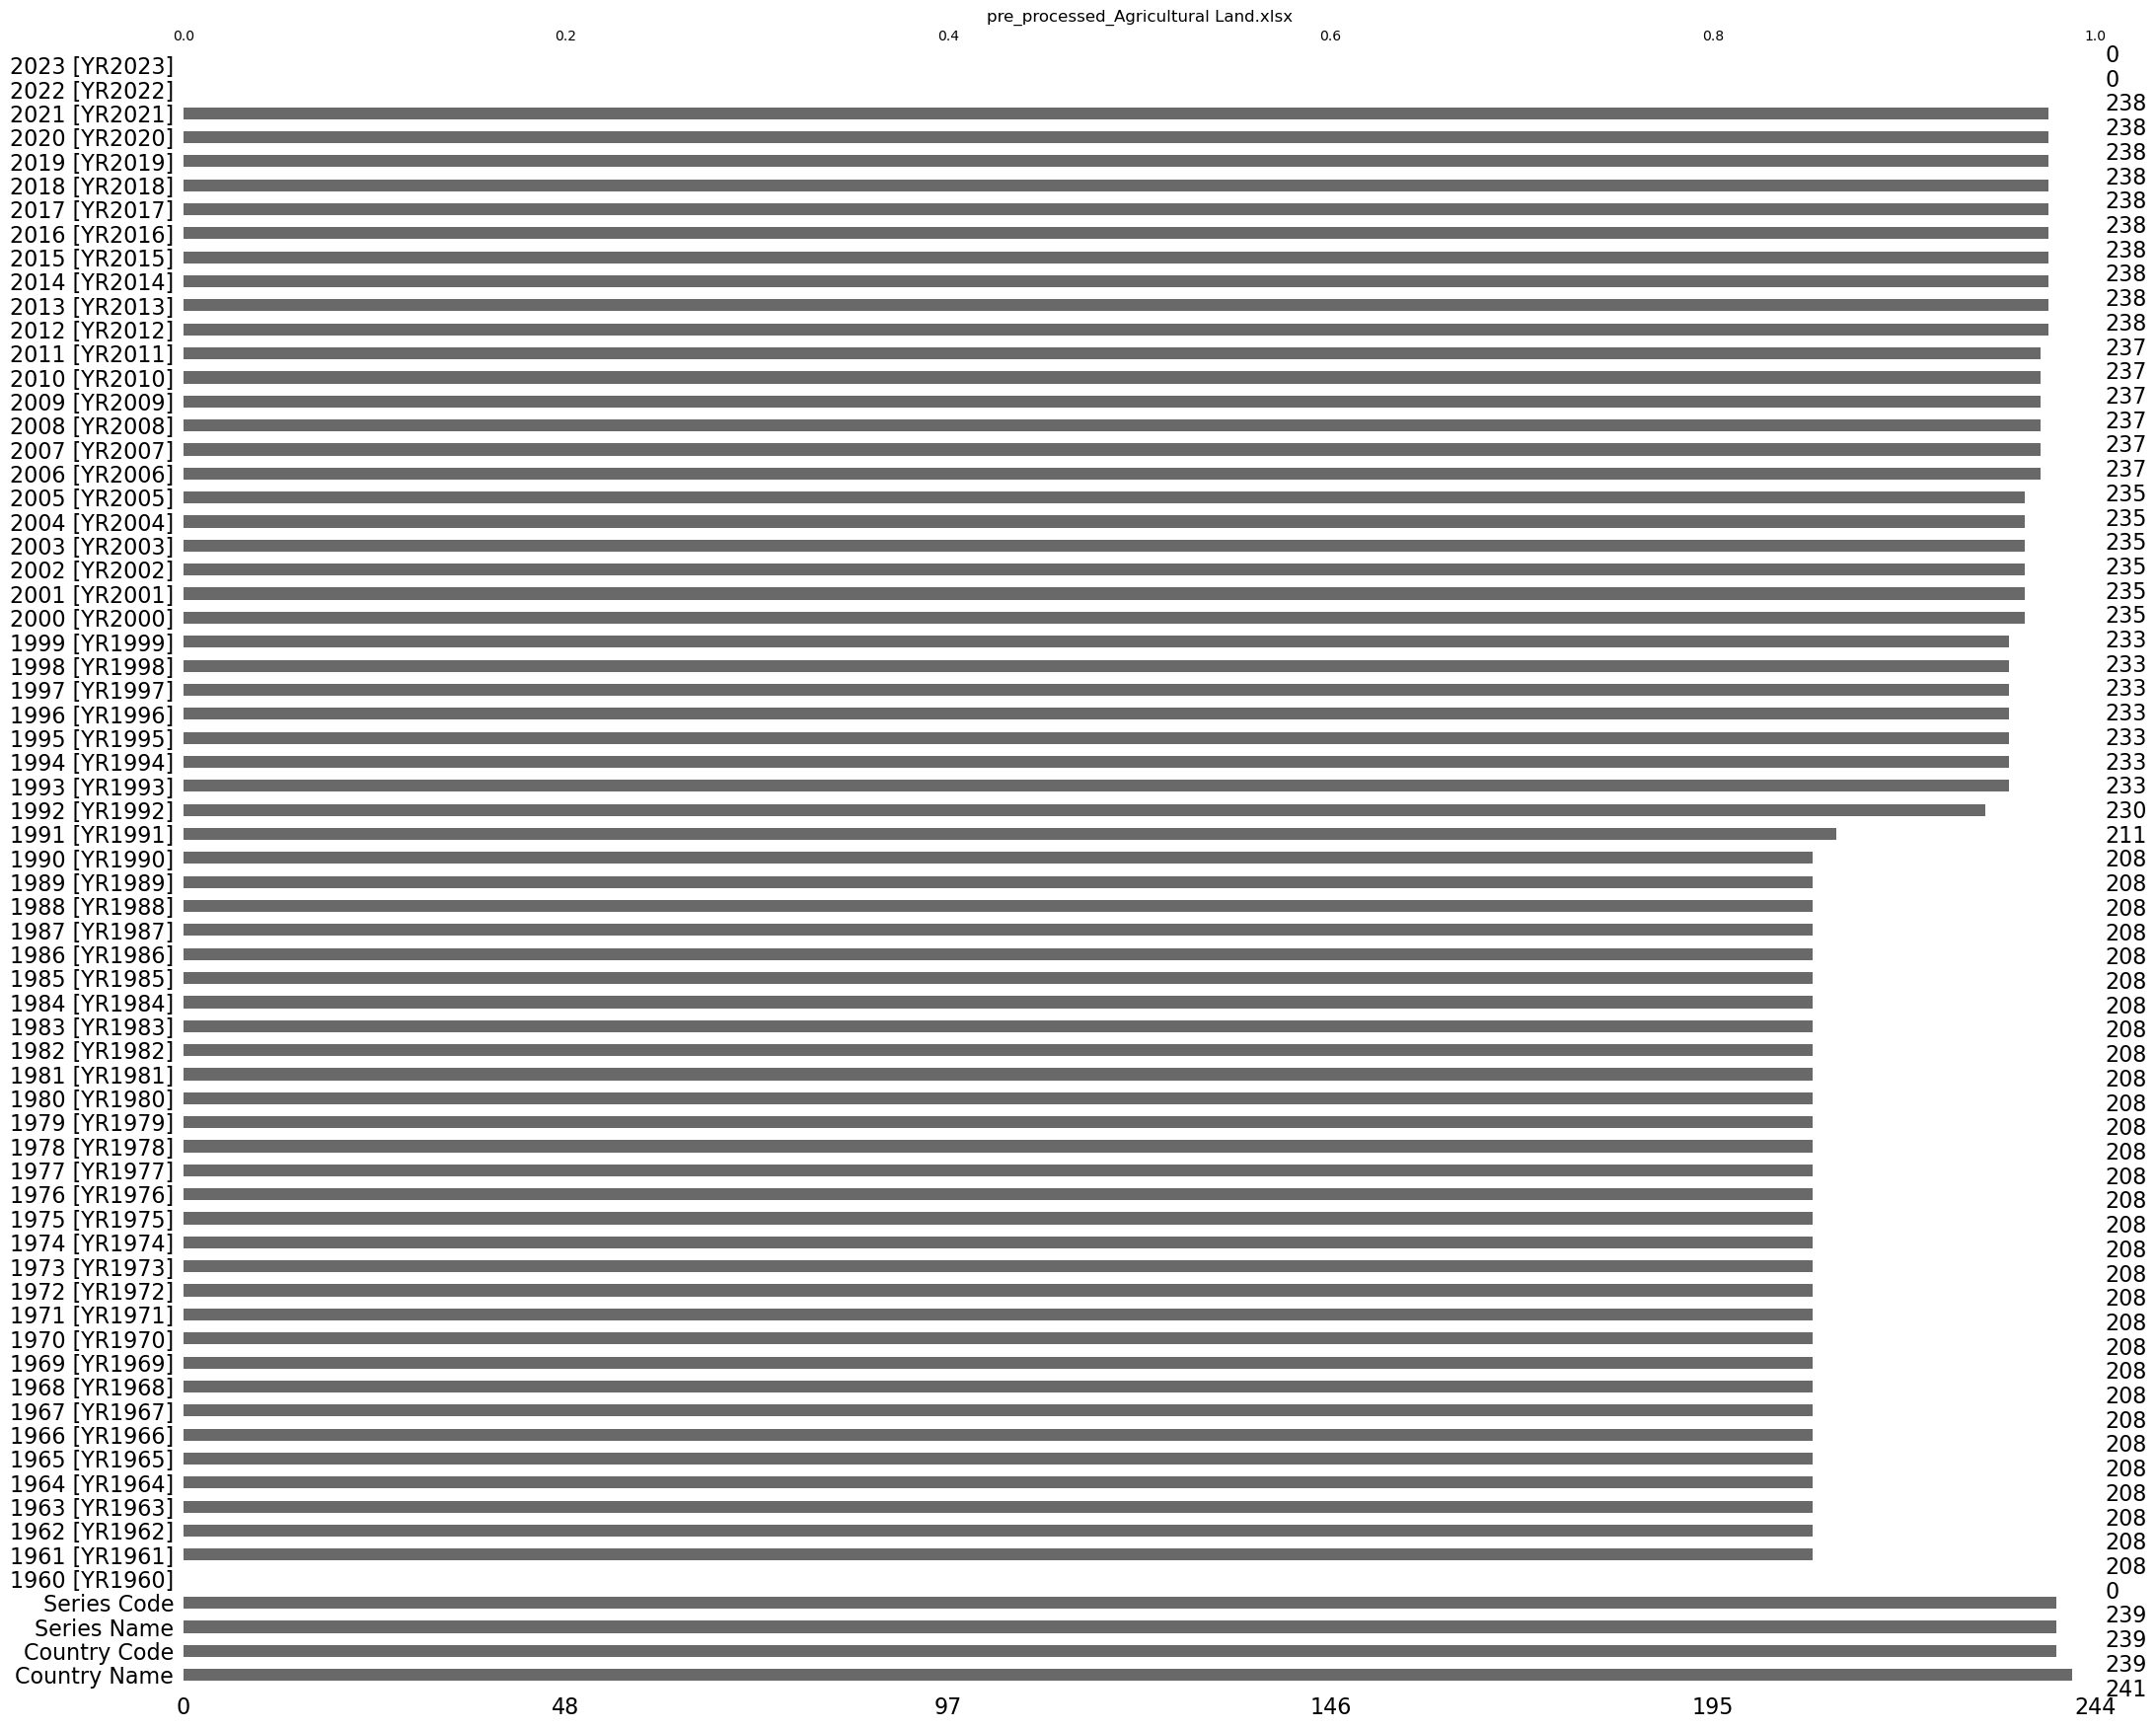

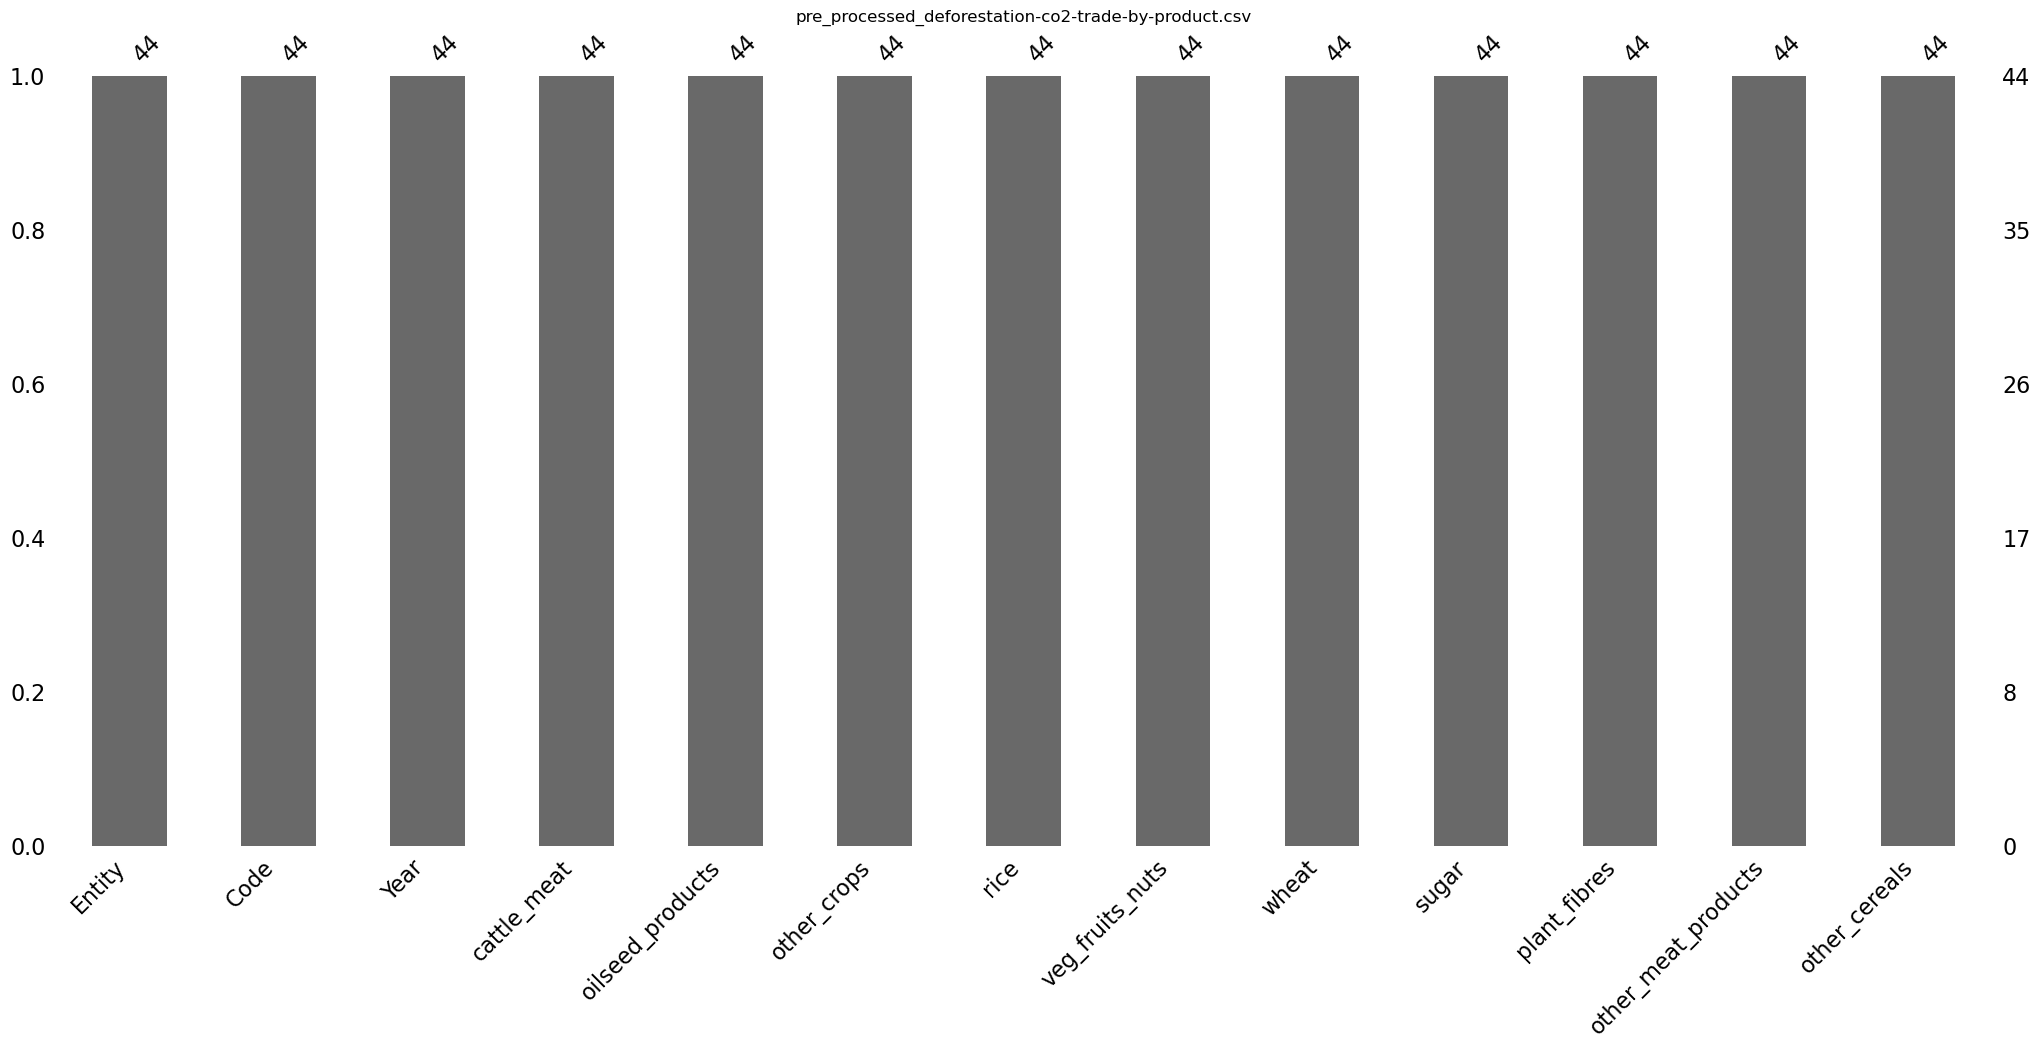

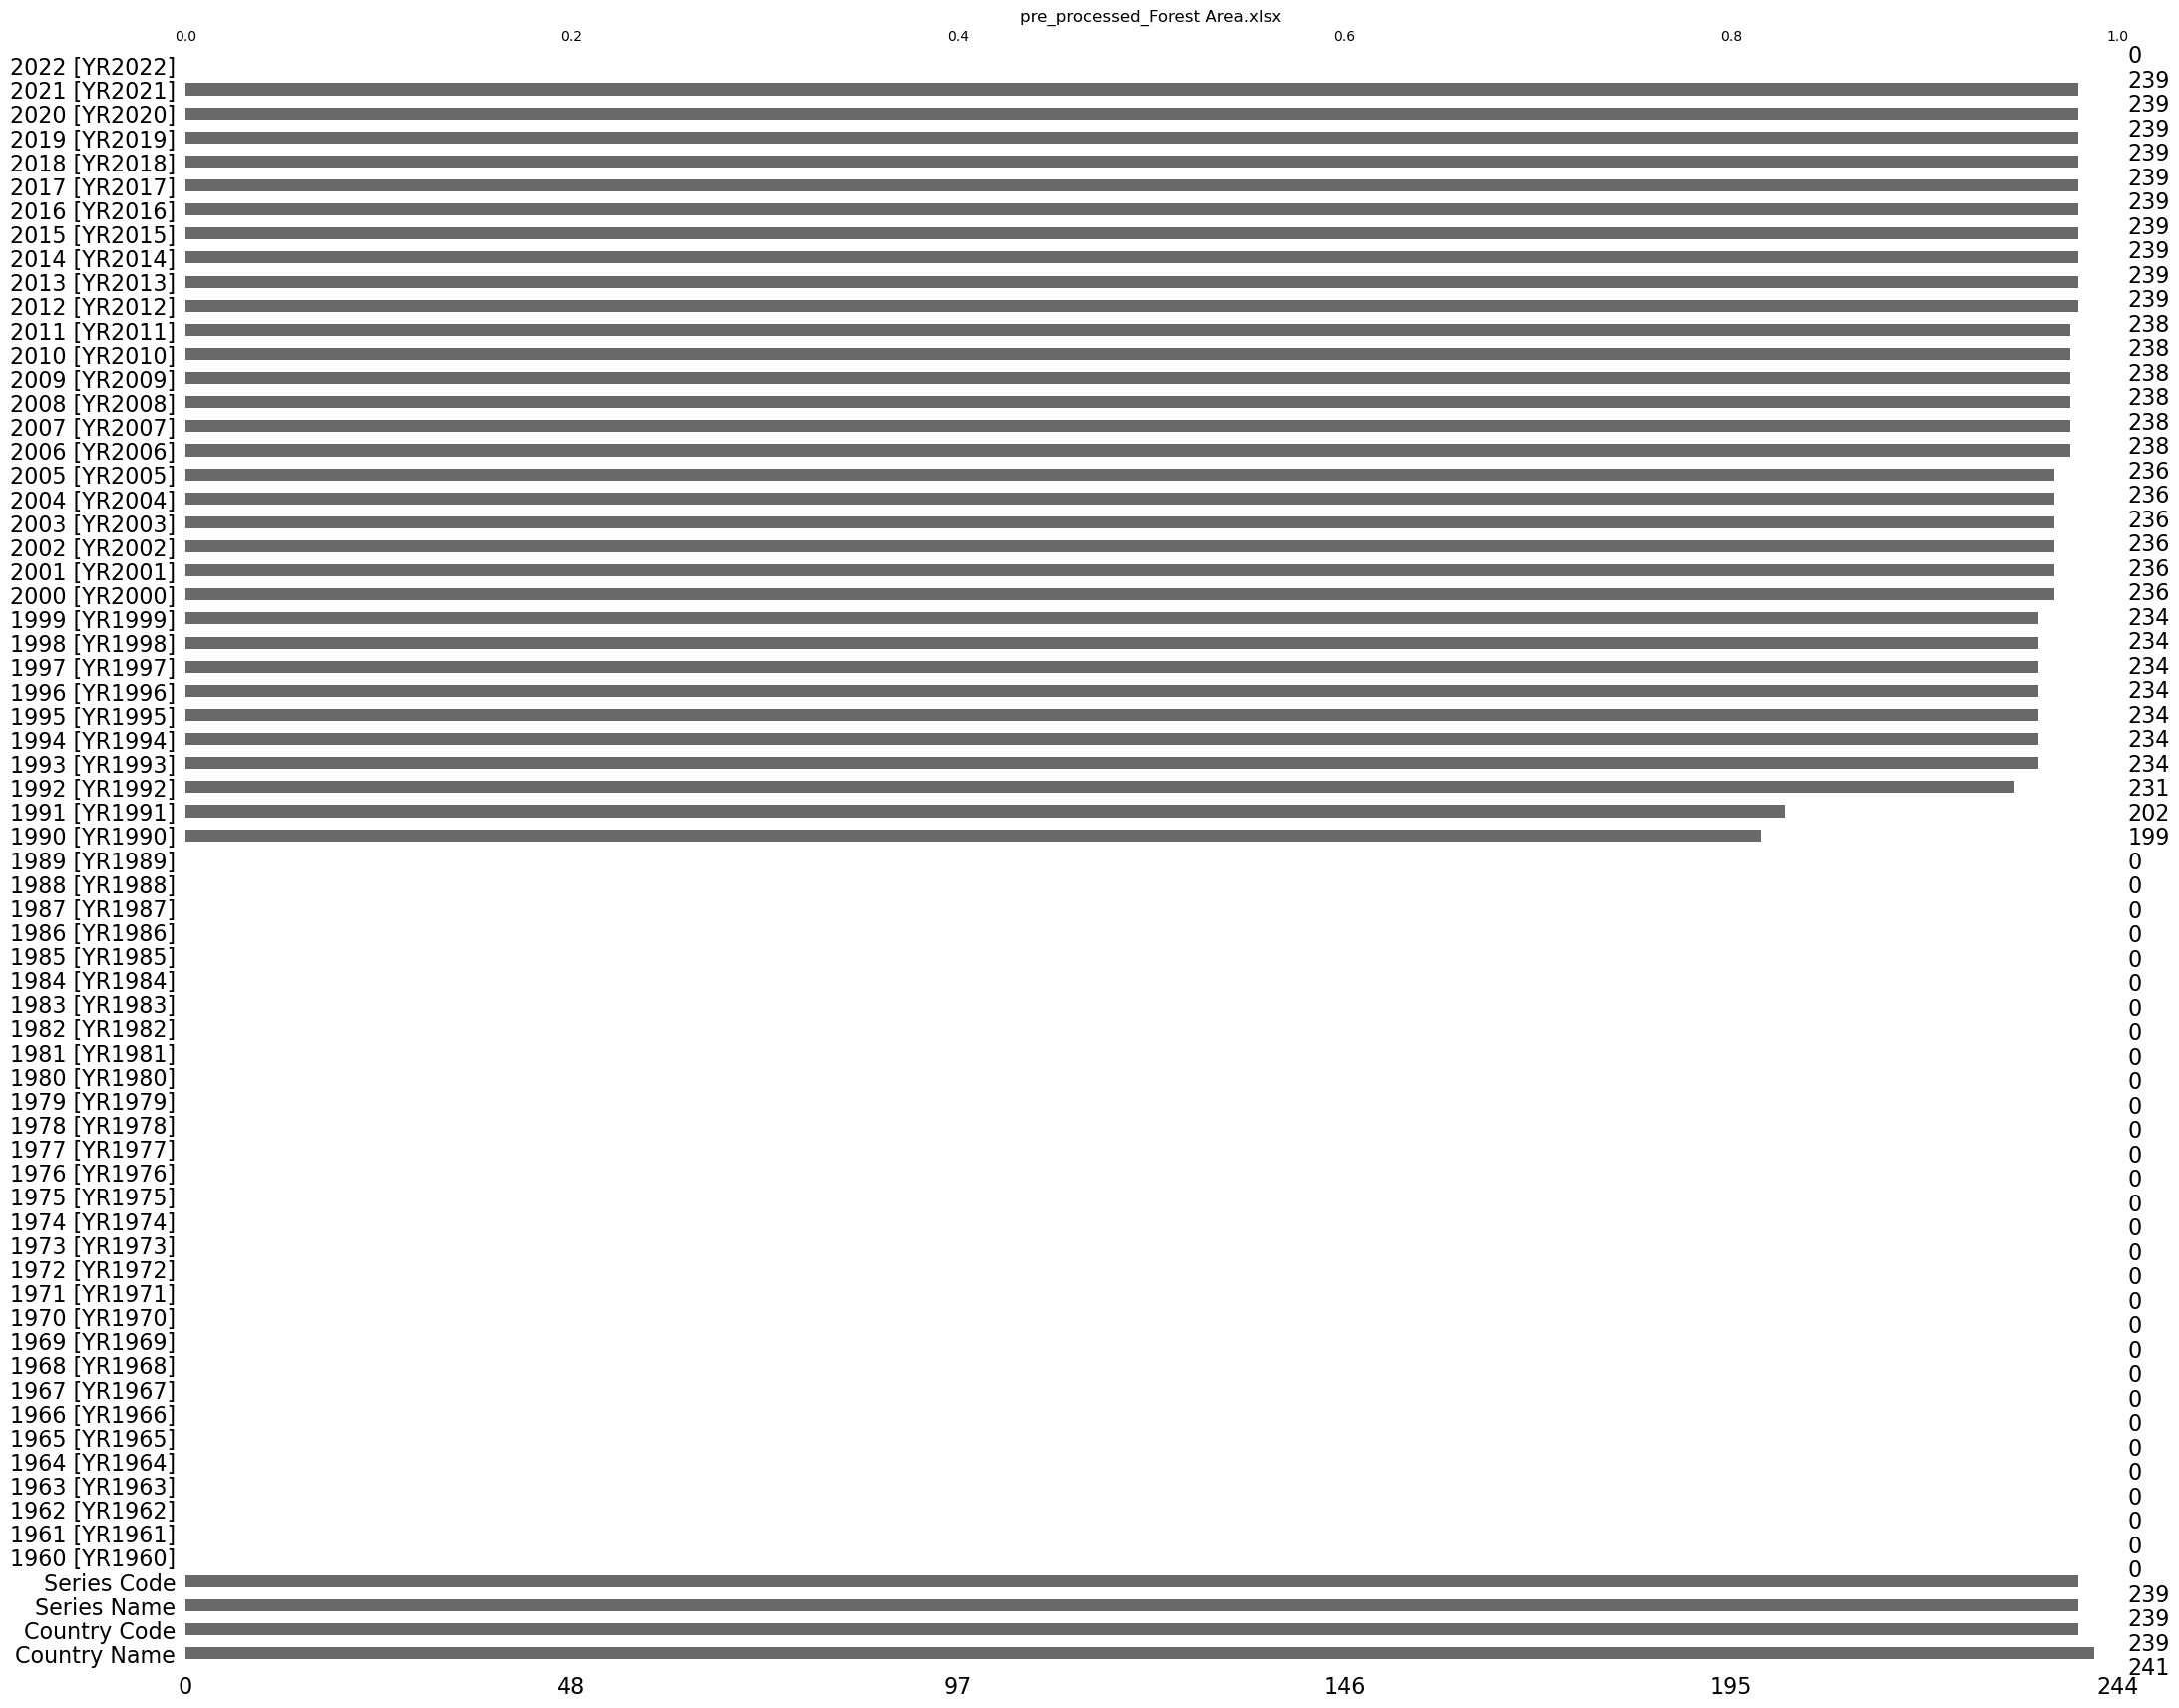

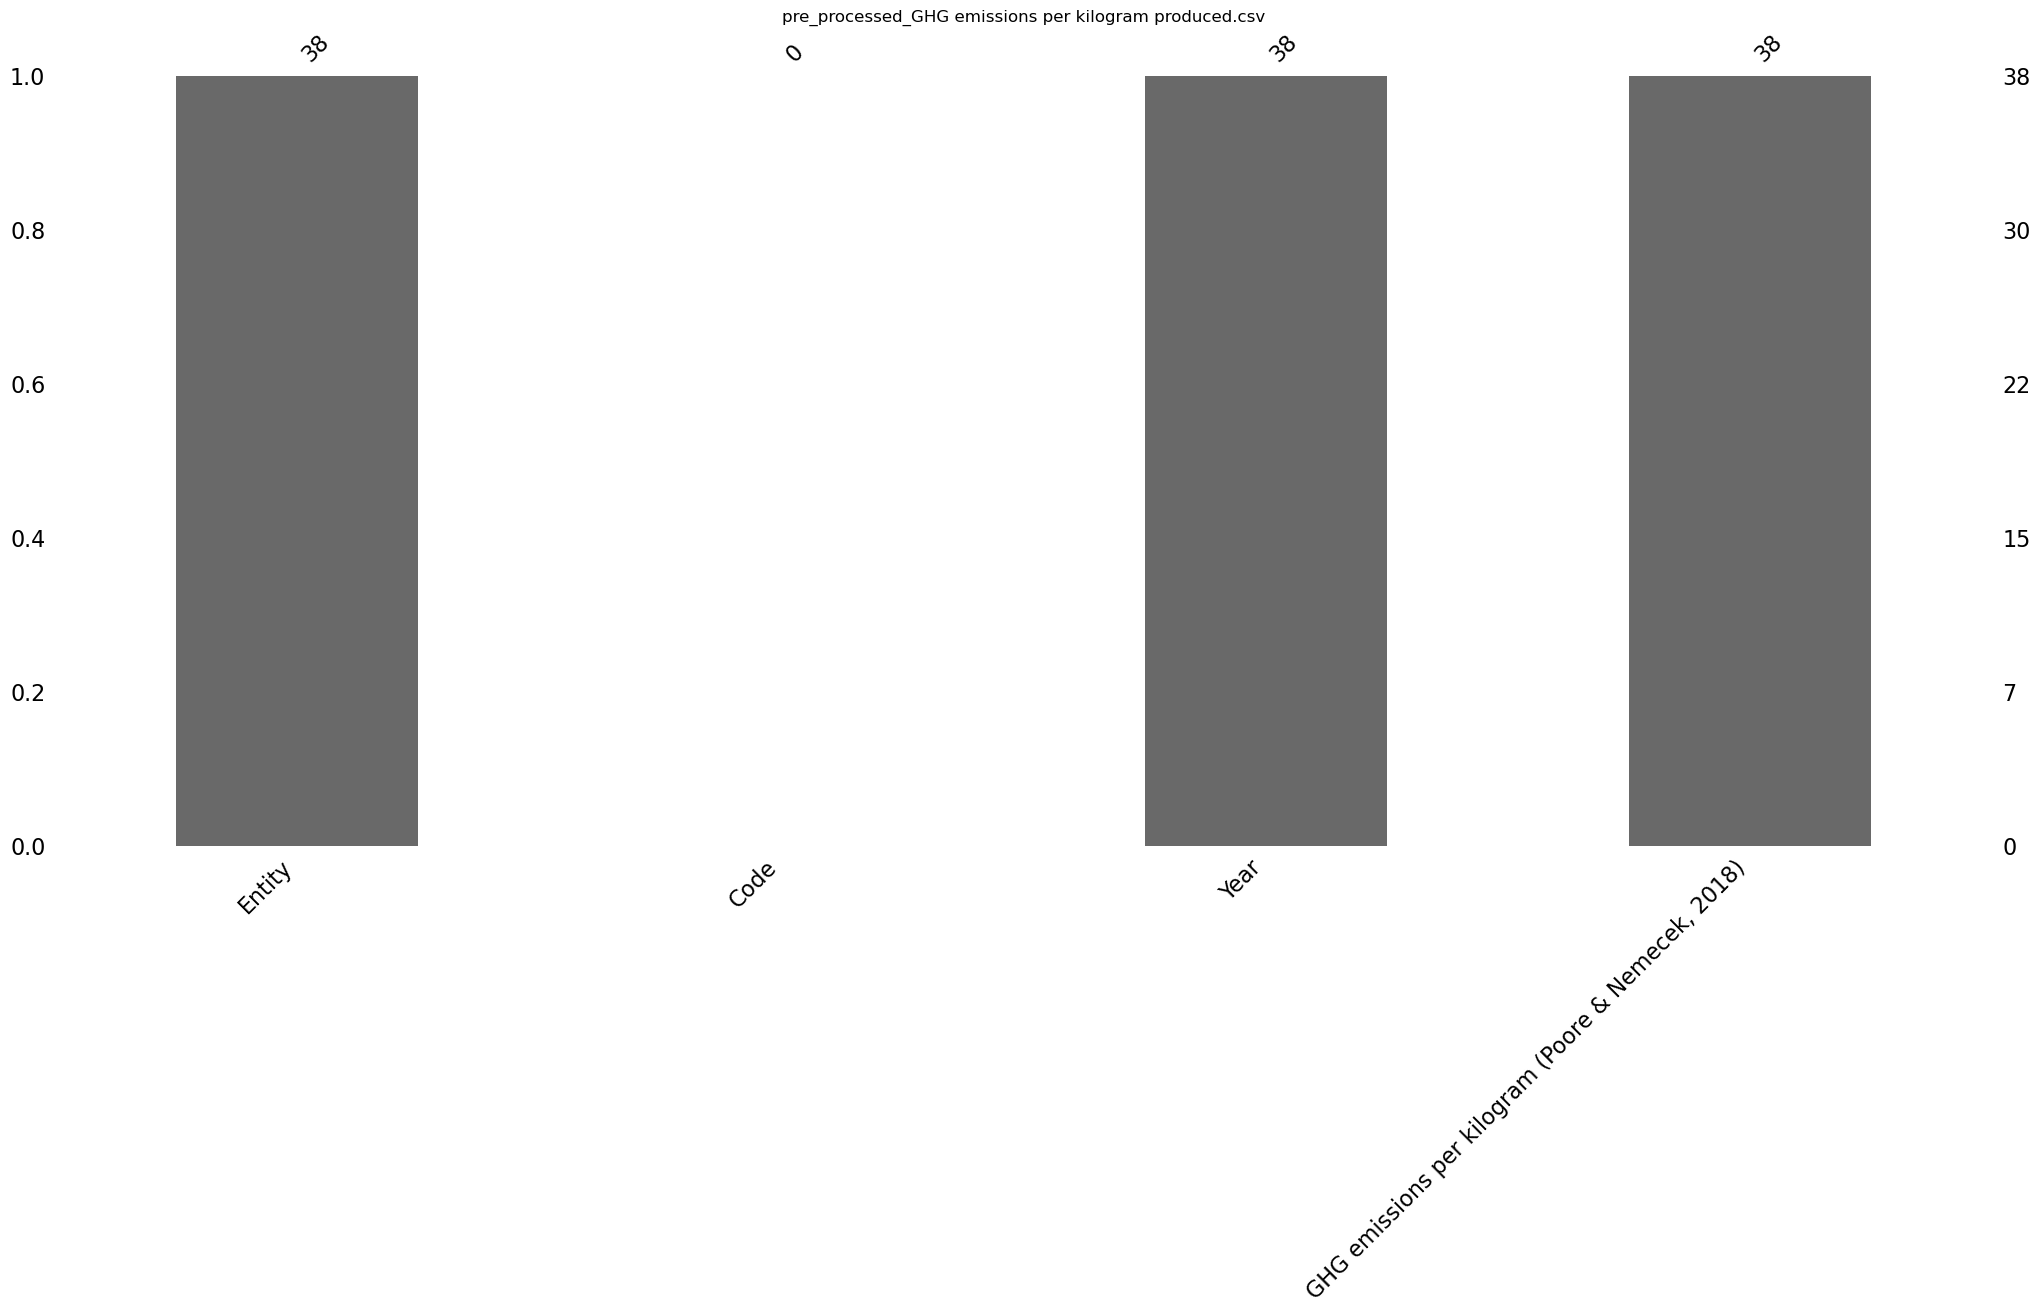

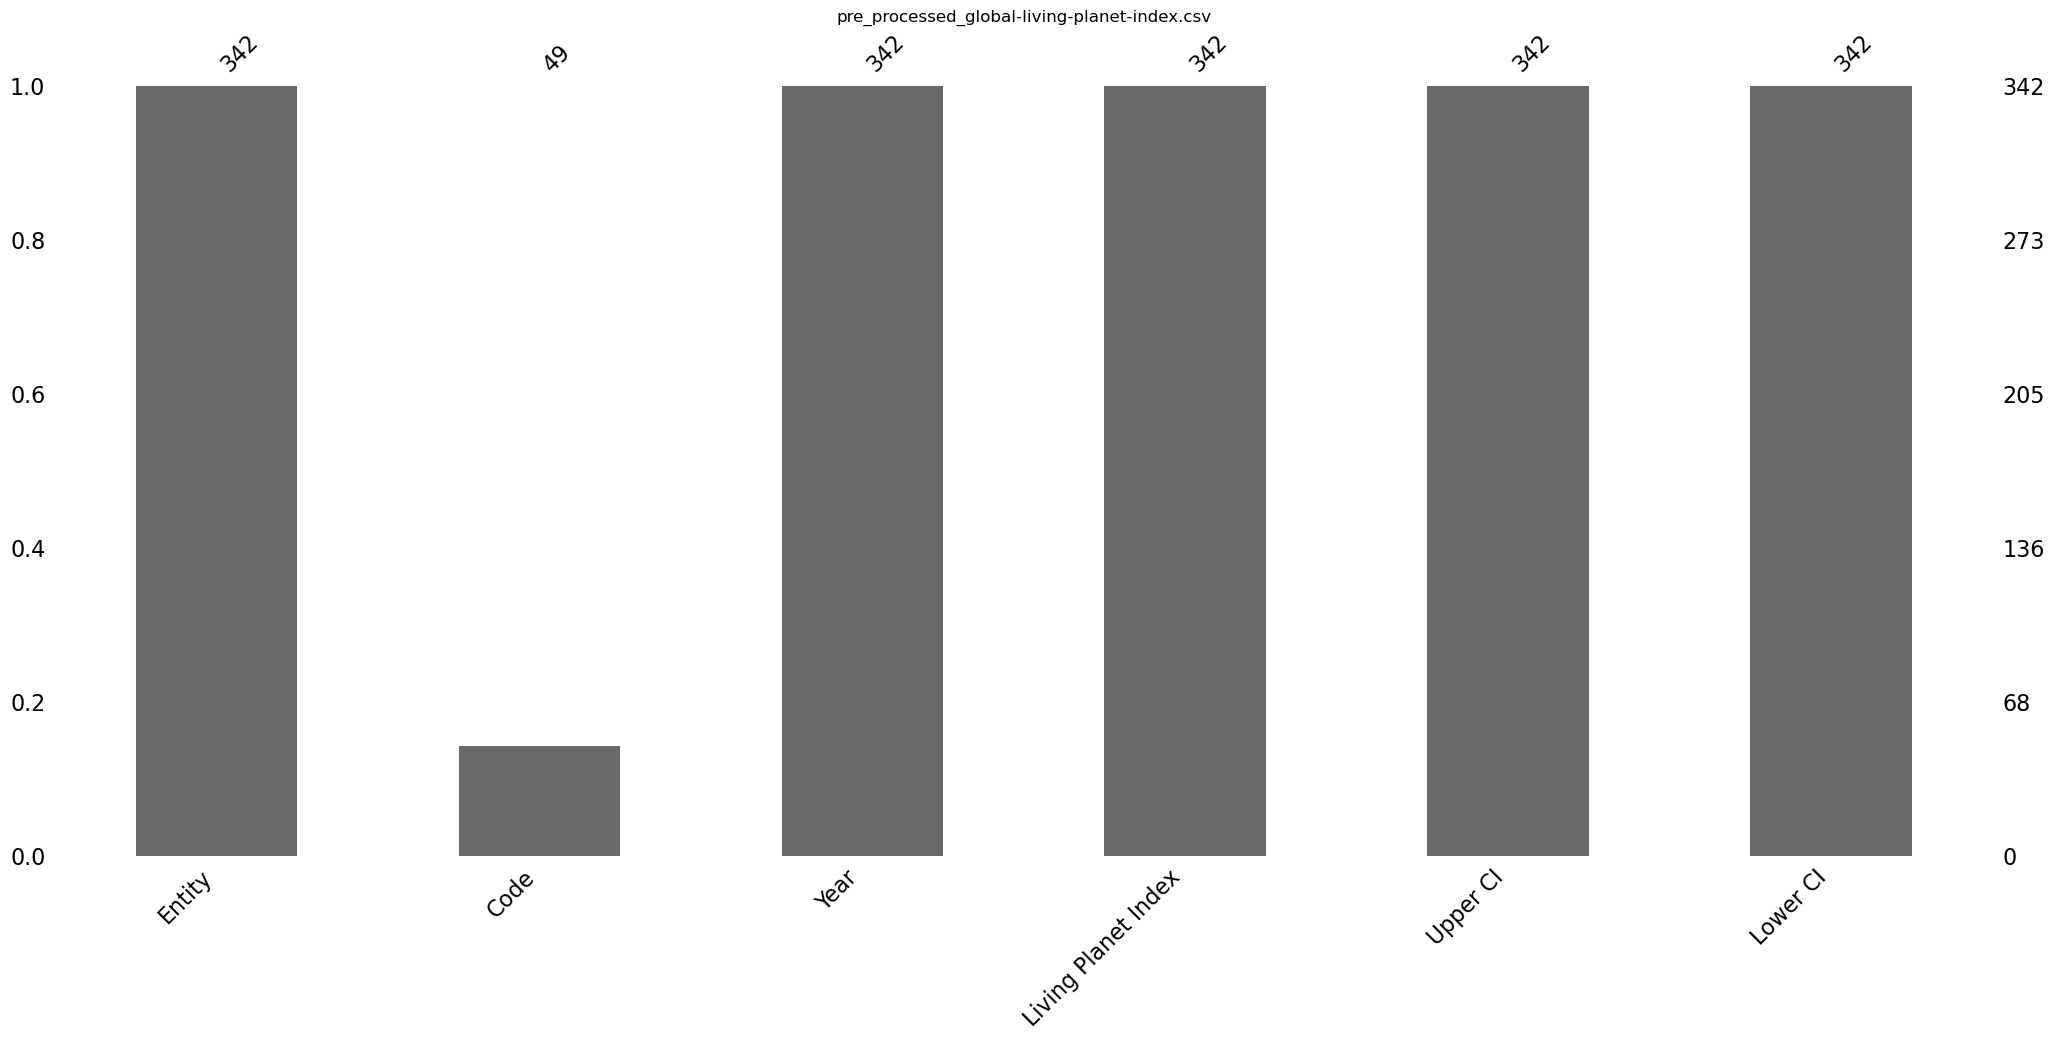

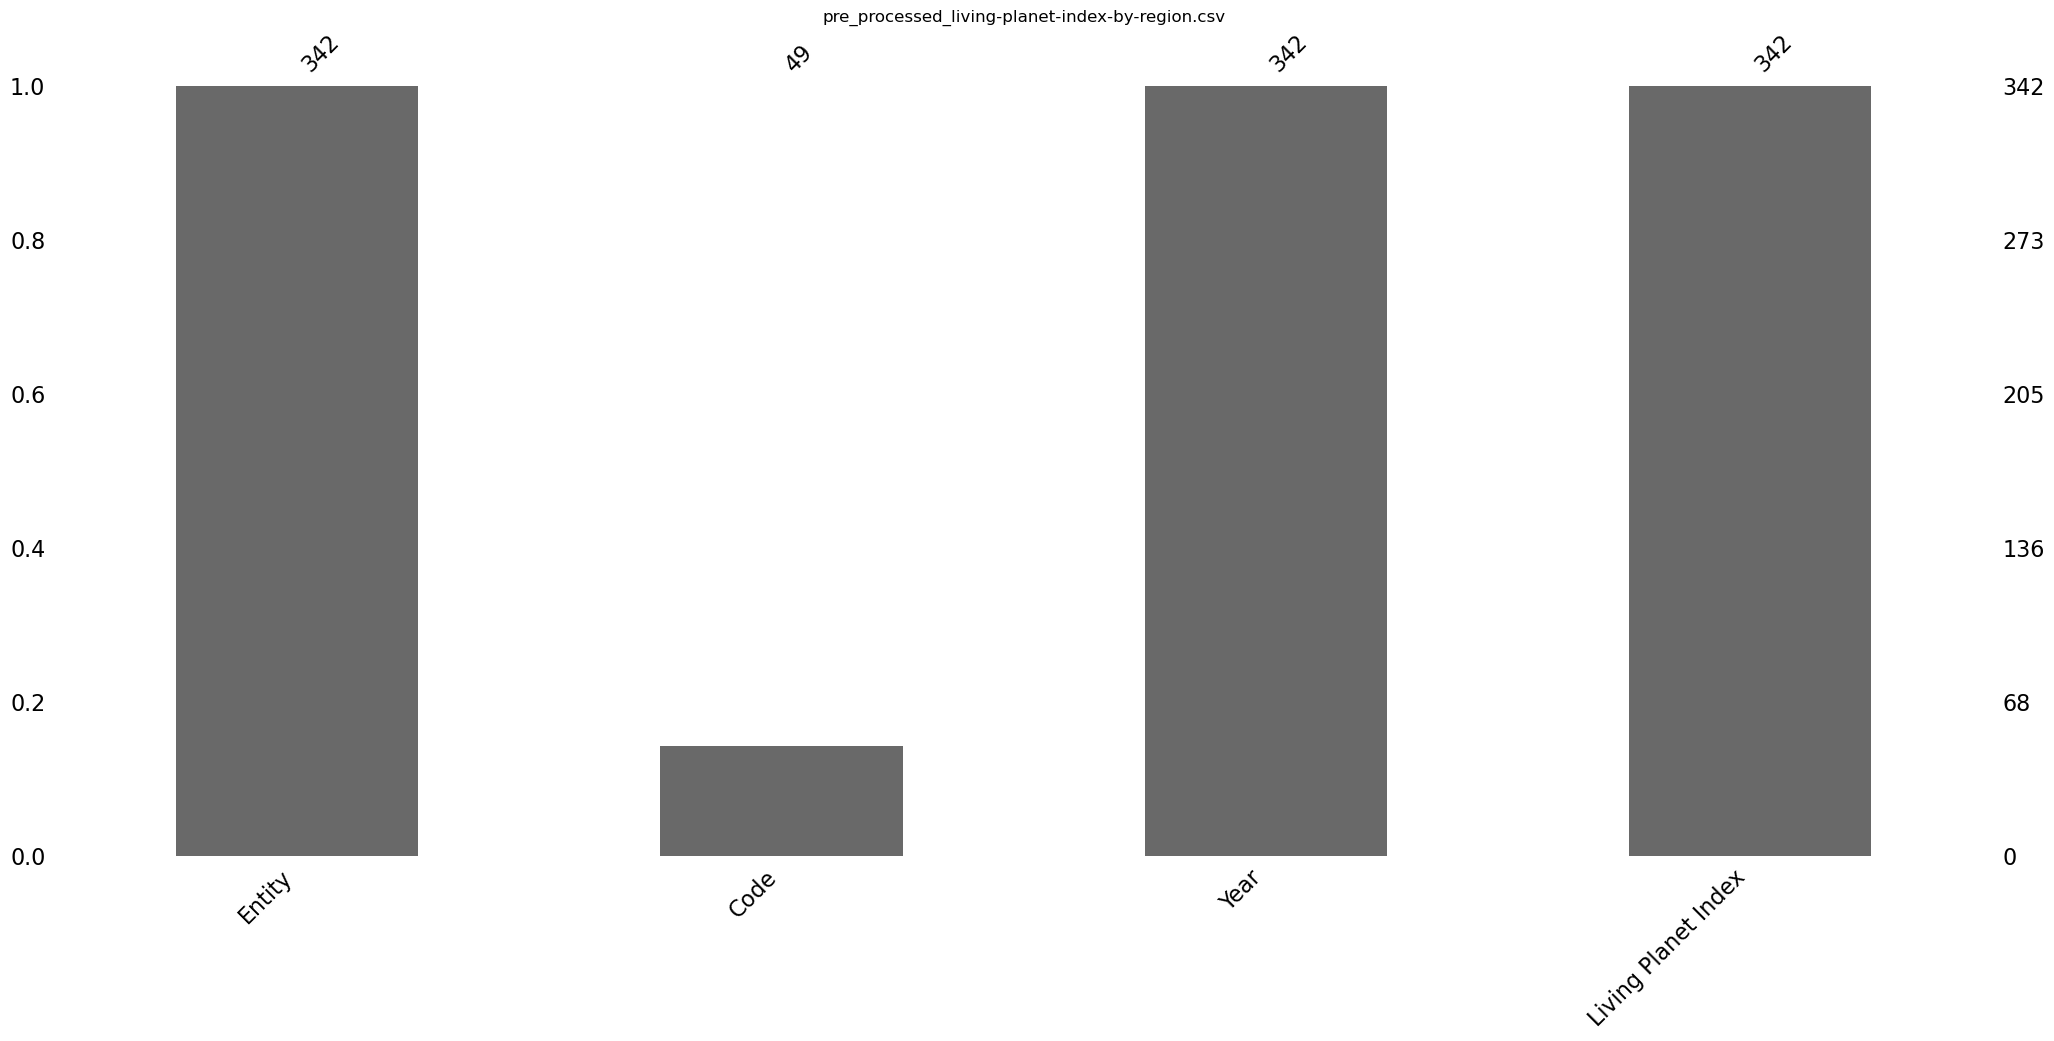

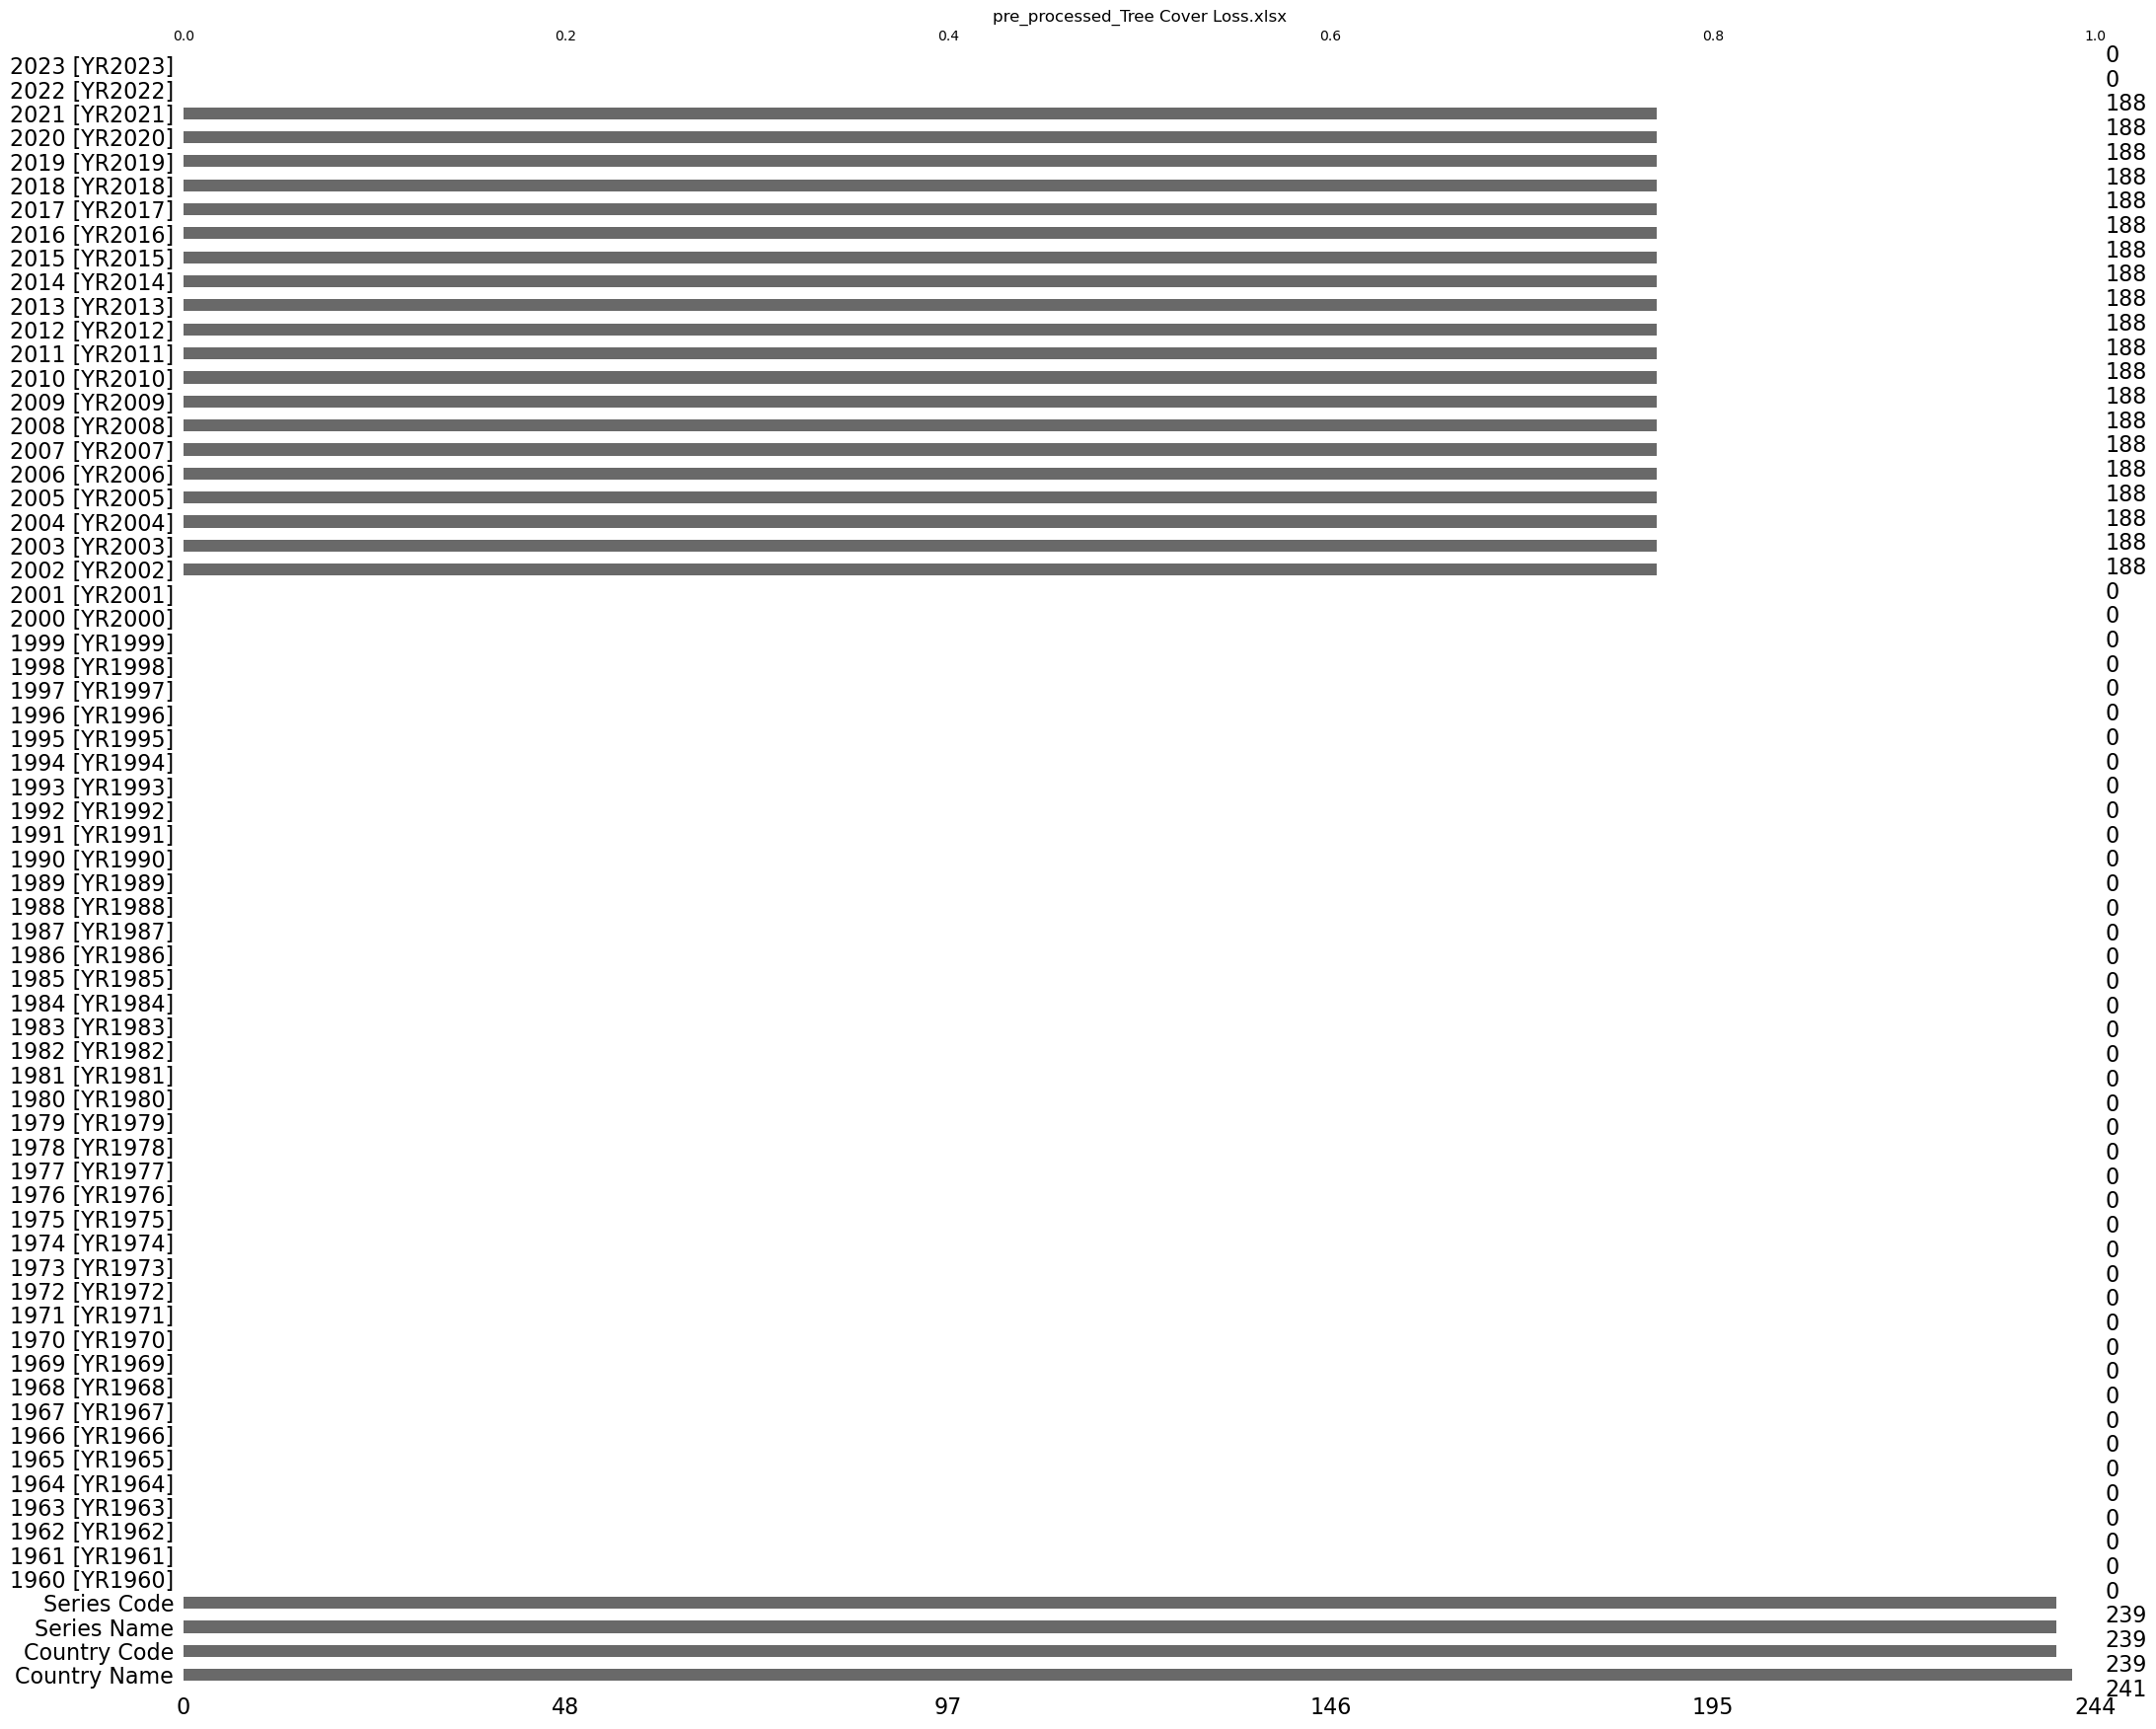

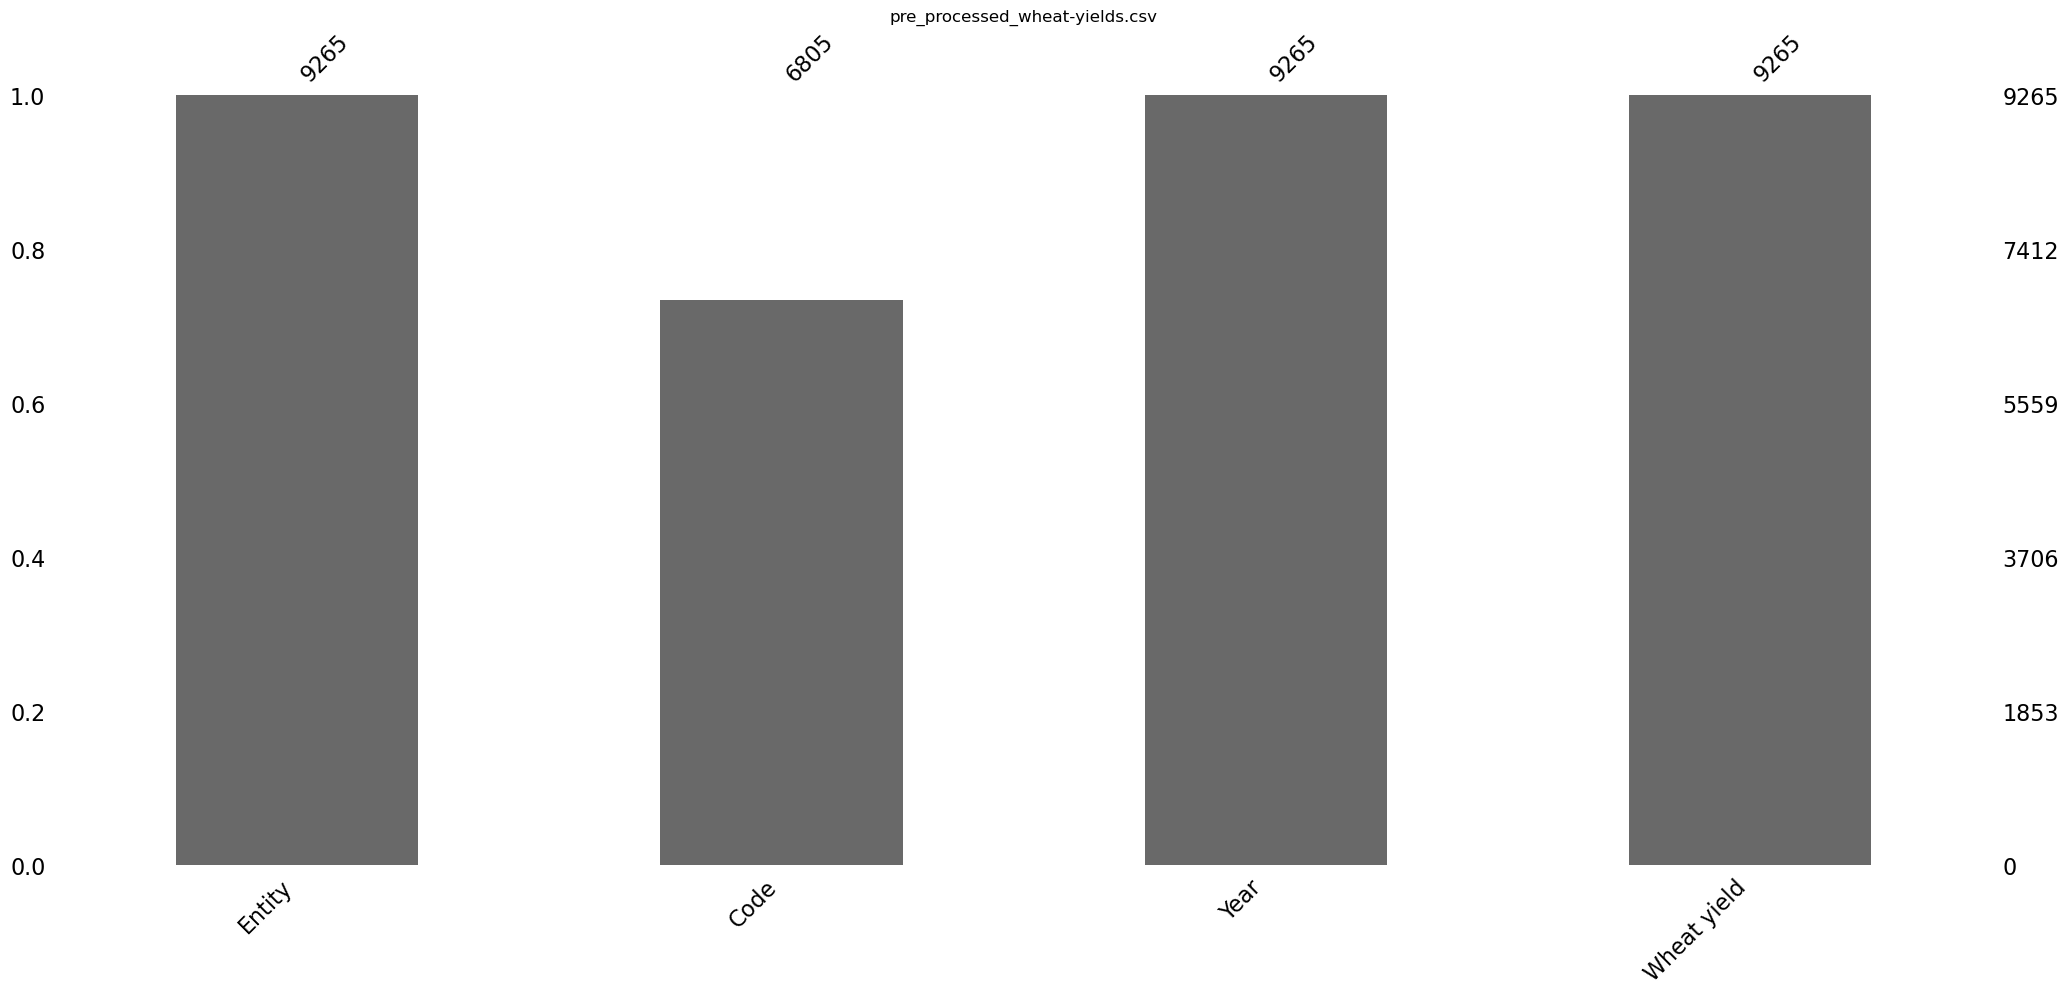

In [5]:
for dataset in os.listdir("Biodiversity"):
    if "xlsx" in dataset:
        df = pd.read_excel('Biodiversity/'+dataset, sheet_name='Data', header=0)
        # print(df.shape)
        
        plt.figure(figsize=(18,8))

        colours = ['#34495E', 'red'] 
        sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))
    else:
        df = pd.read_csv('Biodiversity/'+dataset)
        plt.figure(figsize=(18,8))

        colours = ['#34495E', 'red'] 
        sns.heatmap(df.isnull(), cmap=sns.color_palette(colours))

    for type in [False,True]:
        if type == True:
            preprocress(df)
            dataset= "pre_processed_"+dataset
        
        plt.title(dataset)
        
        plt.savefig("visuals/"+dataset+"heatmap.png")
        plt.clf()
        plt.title(dataset)
        msno.bar(df)
        plt.savefig("visuals/"+dataset+"bar.png")